In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

#Colab use
#from google.colab import files
#uploaded = files.upload()
#import io

In [2]:
# define column names for easy indexing
index_names = ['ID', 'Cycle']
setting_names = ['OpSet1', 'OpSet2', 'OpSet3']
sensor_names = ['SensorMeasure{}'.format(i) for i in range(1,22)] 
col_names = index_names + setting_names + sensor_names

test_data = pd.read_csv("../Data/test_FD001.txt", sep='\s+', header=None, names=col_names)
RUL = pd.read_csv("../Data/RUL_FD001.txt", sep='\s+', header=None, names=['RUL'])

#Colab use
#test_data = pd.read_csv(io.BytesIO(uploaded['test_FD001.txt']), sep='\s+', header=None, names=col_names)
#RUL = pd.read_csv(io.BytesIO(uploaded['RUL_FD001.txt']), sep='\s+', header = None, names=['RUL'])

* **Column 1:** Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)

* **Column 2:** Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines.

* **Columns 3,4,5:** 3 operational settings

* **Columns 6-26:** 21 sensor measurements

In [3]:
test_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [4]:
print("Number of machine: ", len(test_data['ID'].unique())) #number of engines
print("Number of Record: ", len(test_data), "\n") #numbers of records

Number of machine:  100
Number of Record:  13096 



# Describe Dataset

In [5]:
test_data[index_names].describe()

,ID,Cycle
count,13096.000000,13096.000000
mean,51.543907,76.836515
std,28.289423,53.057749
min,1.000000,1.000000
25%,28.000000,33.000000
50%,52.000000,69.000000
75%,76.000000,113.000000
max,100.000000,303.000000


In [6]:
test_data[index_names].groupby('ID').max().describe()

,Cycle
count,100.000000
mean,130.960000
std,53.593479
min,31.000000
25%,88.750000
50%,133.500000
75%,164.250000
max,303.000000


In [7]:
test_data[setting_names].describe()

,OpSet1,OpSet2,OpSet3
count,13096.000000,13096.000000,13096.0
mean,-0.000011,0.000004,100.0
std,0.002203,0.000294,0.0
min,-0.008200,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.007800,0.000700,100.0


In [8]:
test_data[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SensorMeasure1,13096.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
SensorMeasure2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
SensorMeasure3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
SensorMeasure4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
SensorMeasure5,13096.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200
SensorMeasure6,13096.0,21.609701,1.704085e-03,21.6000,21.6100,21.6100,21.6100,21.6100
SensorMeasure7,13096.0,553.757523,6.812861e-01,550.8800,553.3100,553.8000,554.2400,555.8400
SensorMeasure8,13096.0,2388.070964,5.744178e-02,2387.8900,2388.0300,2388.0700,2388.1100,2388.3000
SensorMeasure9,13096.0,9058.407363,1.143626e+01,9024.5300,9051.0200,9057.3200,9064.1100,9155.0300
SensorMeasure10,13096.0,1.300000,3.157595e-13,1.3000,1.3000,1.3000,1.3000,1.3000


In [9]:
print("Unique value")
test_data.nunique(axis=0) #number of unique value

Unique value


ID                  100
Cycle               303
OpSet1              150
OpSet2               14
OpSet3                1
SensorMeasure1        1
SensorMeasure2      262
SensorMeasure3     2361
SensorMeasure4     2954
SensorMeasure5        1
SensorMeasure6        2
SensorMeasure7      415
SensorMeasure8       41
SensorMeasure9     4047
SensorMeasure10       1
SensorMeasure11     136
SensorMeasure12     357
SensorMeasure13      43
SensorMeasure14    3786
SensorMeasure15    1506
SensorMeasure16       1
SensorMeasure17       9
SensorMeasure18       1
SensorMeasure19       1
SensorMeasure20     103
SensorMeasure21    3555
dtype: int64

# Calculare RUL

In [10]:
EOL = [] #Enf of Life of engine
#RUL.loc[1]

for engine_id in test_data['ID']:
    #RUL + current cycle bacause the RUL provided is the RUL after the last record
    EOL.append(RUL.loc[engine_id - 1].values[0] + ((test_data[test_data['ID'] == engine_id]['Cycle']).values)[-1])

In [11]:
test_data['EOL'] = EOL

test_data["RUL"] = test_data["EOL"]-test_data["Cycle"] #RUL = End of Life - current cycle
RUL = EOL - test_data["Cycle"] #update the correct RUL
test_data = test_data.drop(columns=['EOL'])

#test_data.to_csv('test_set.csv', index=None)

test_data[index_names+['RUL']].head()

,ID,Cycle,RUL
0,1,1,142
1,1,2,141
2,1,3,140
3,1,4,139
4,1,5,138


# Histogram

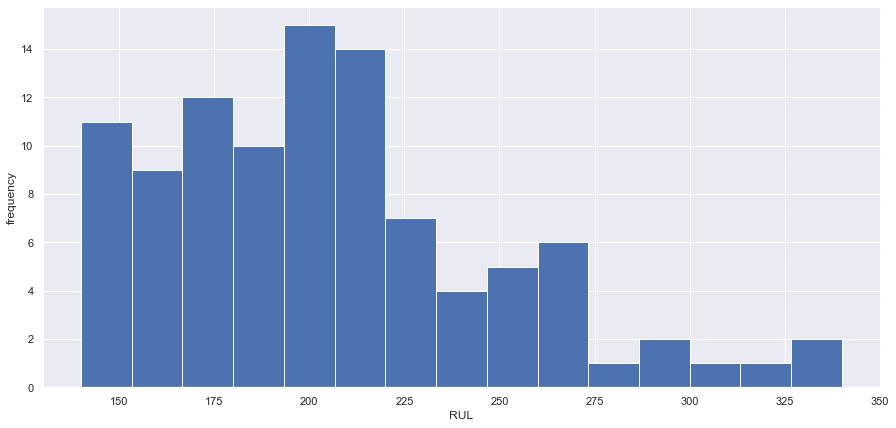

In [12]:
df_max_rul = test_data[['ID', 'RUL']].groupby('ID').max().reset_index()

df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

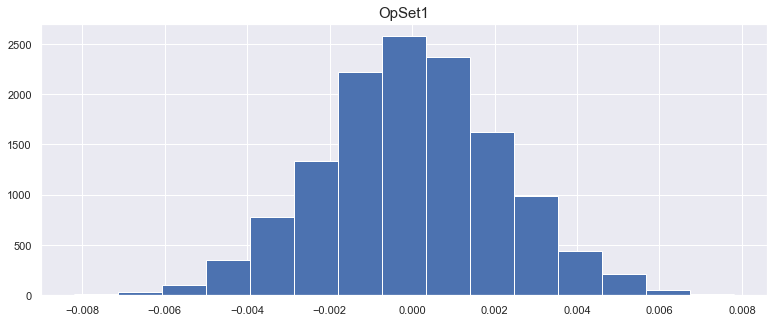

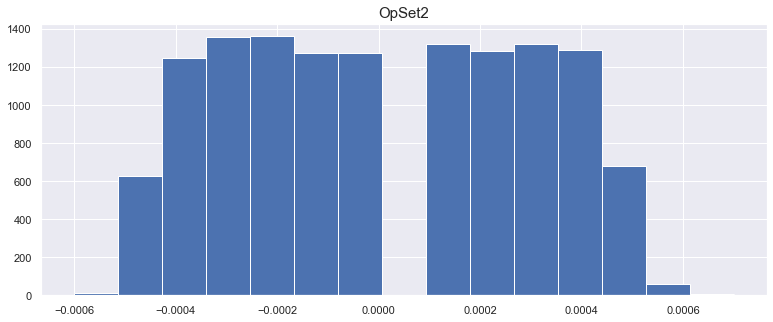

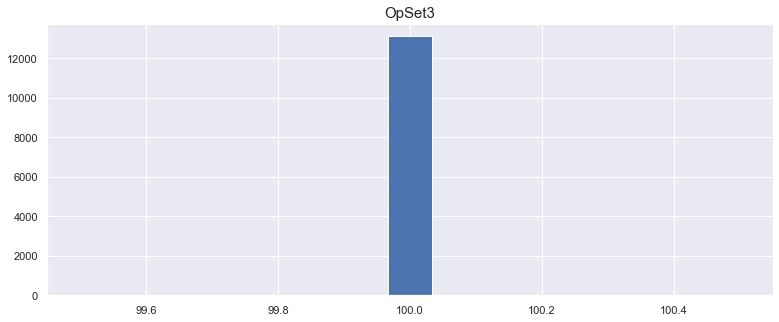

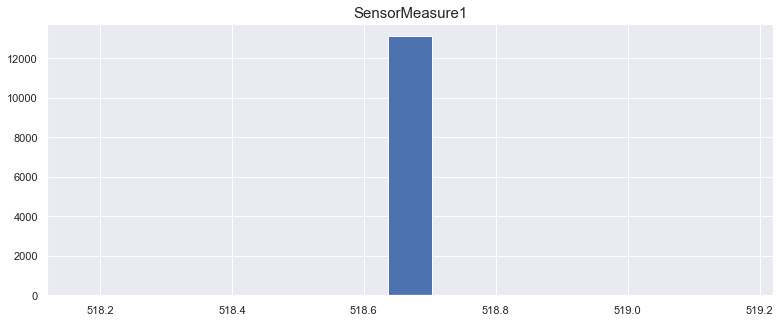

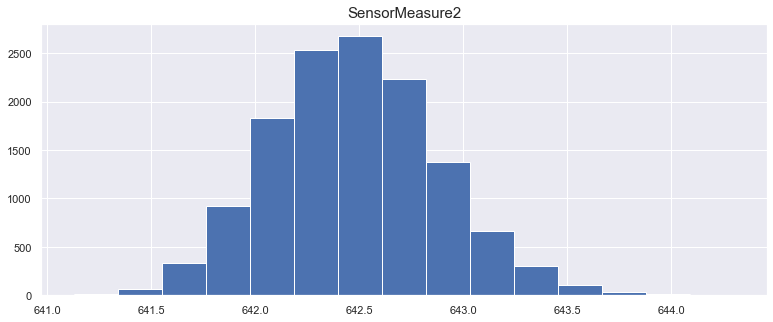

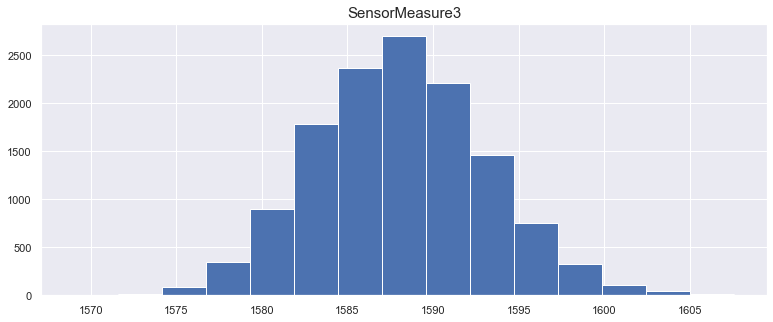

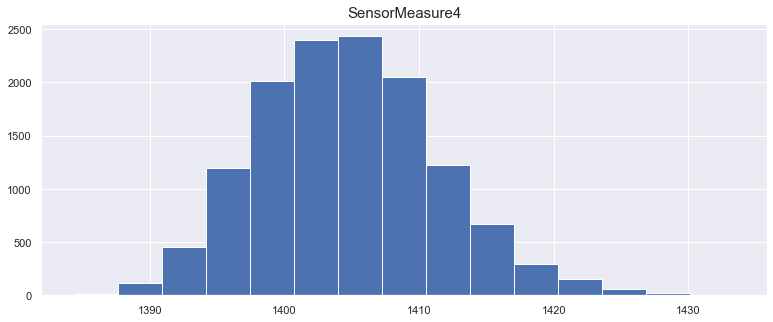

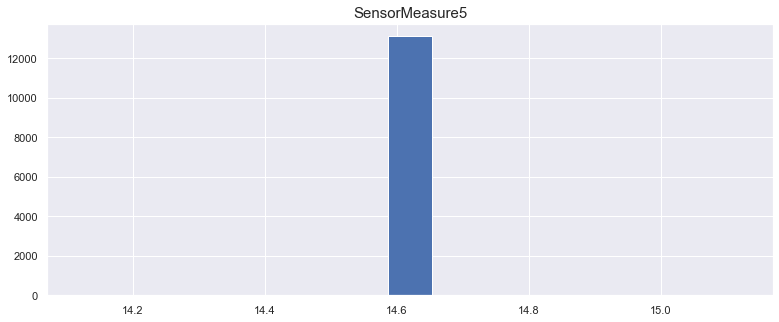

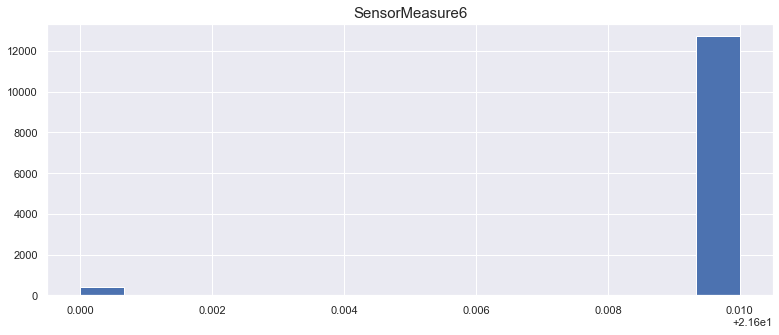

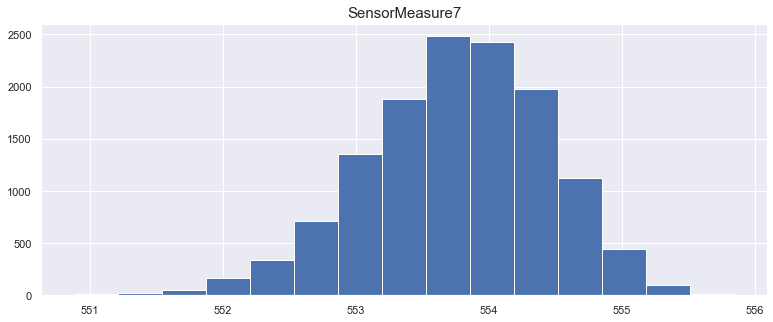

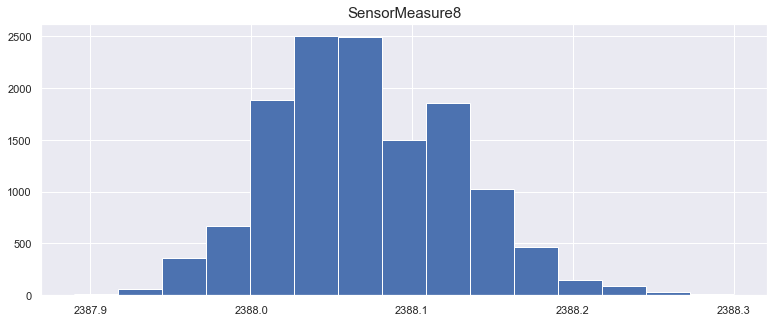

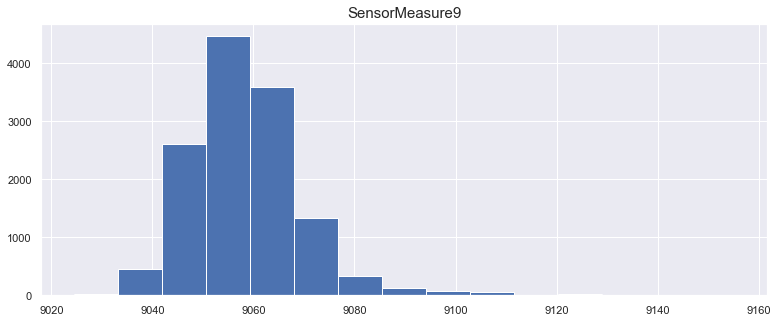

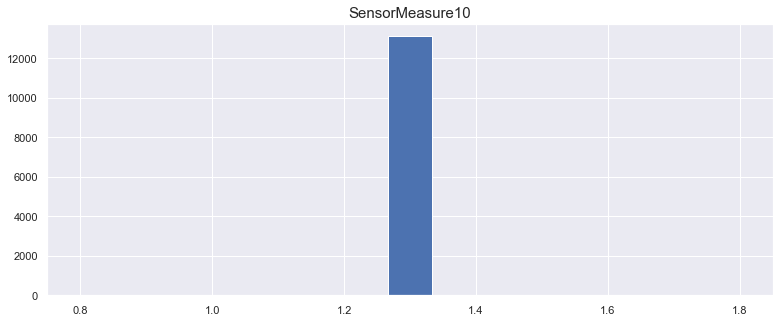

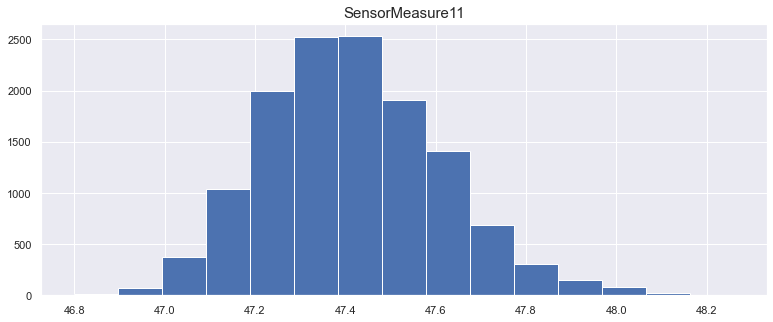

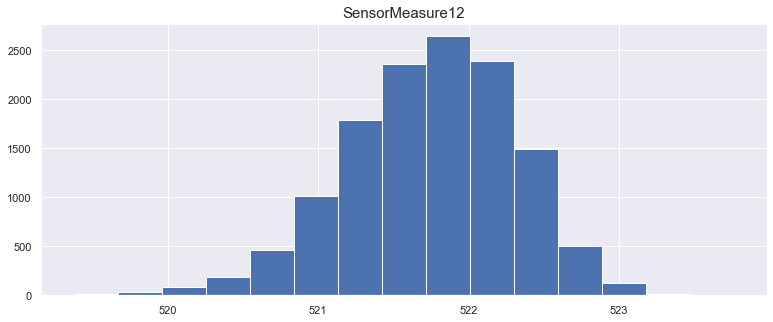

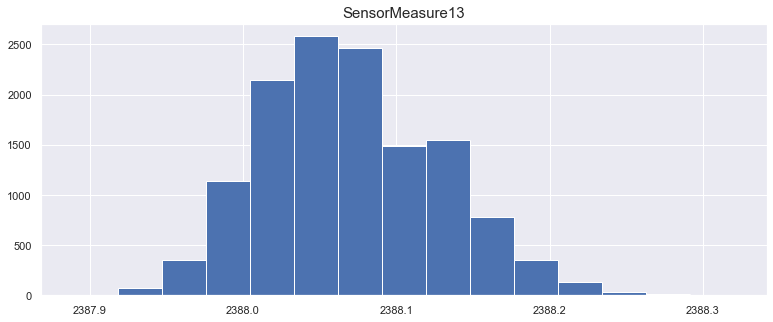

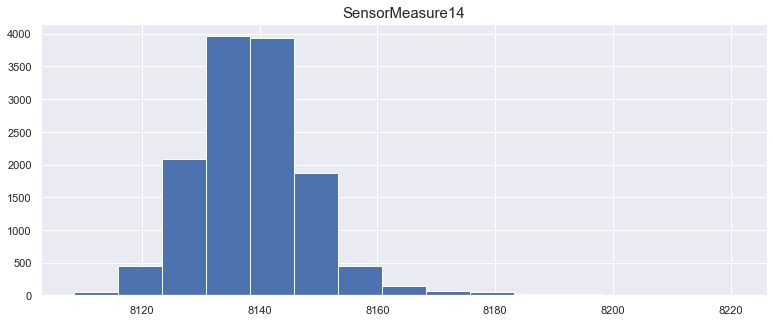

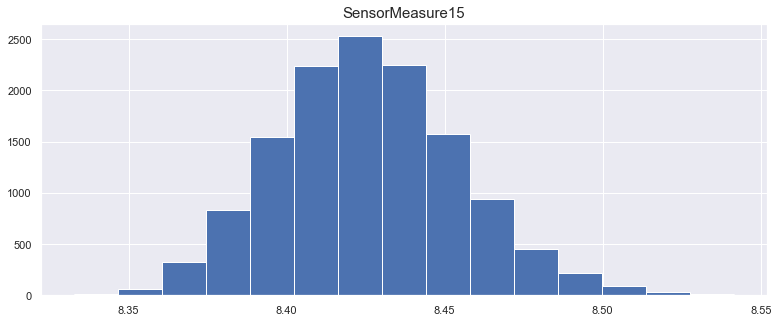

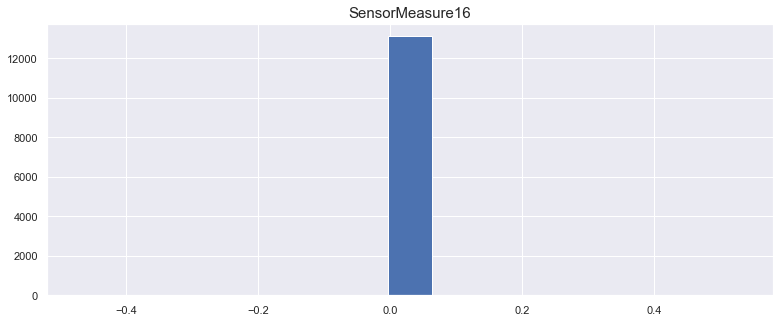

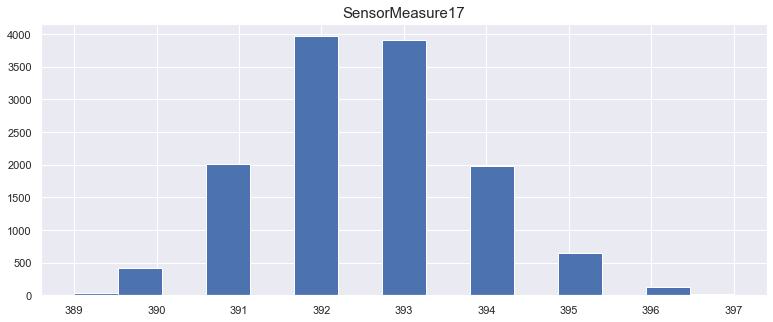

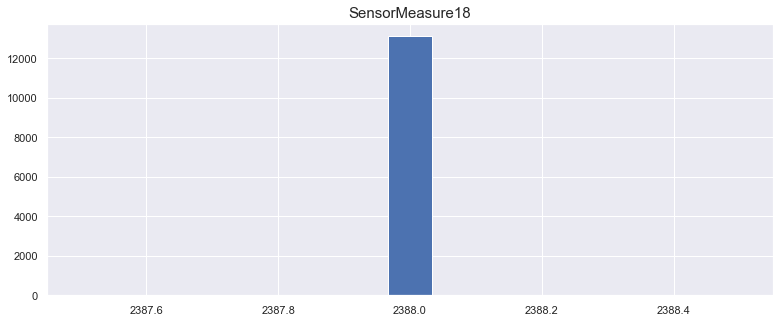

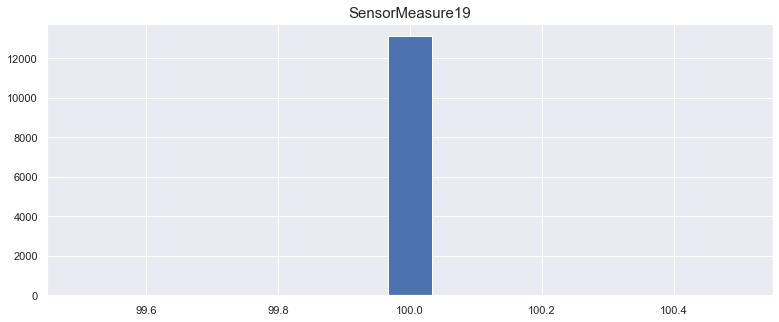

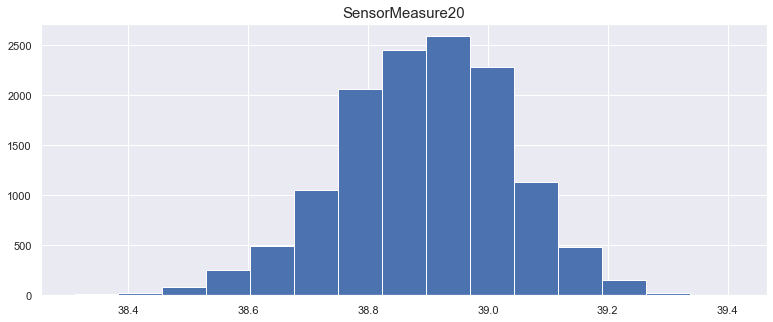

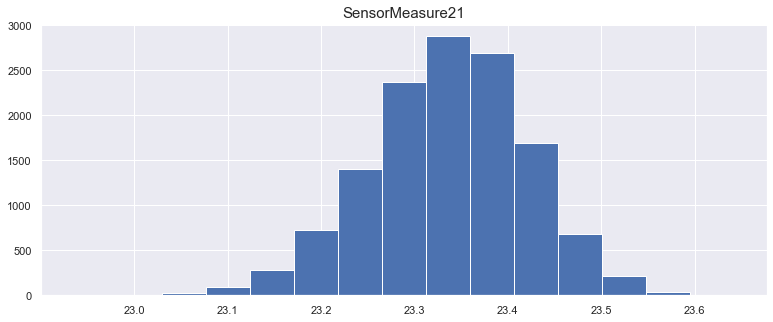

In [13]:
for i in np.arange(2, 26):
    plt.figure(figsize=(13,5))
    temp = test_data.iloc[:, i]
    plt.hist(temp, bins = 15)
    plt.title(test_data.columns[i], fontsize = 15)
    plt.show()

# Box Plot

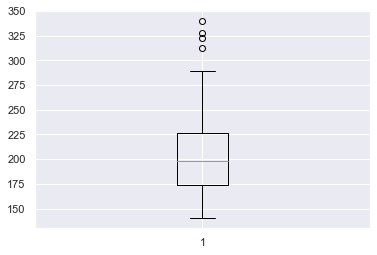

In [14]:
df_max_rul = test_data[['ID', 'RUL']].groupby('ID').max().reset_index()
plt.boxplot(df_max_rul['RUL'])

plt.show()

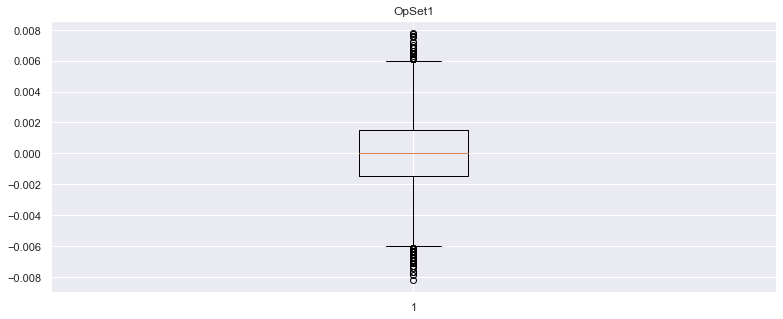

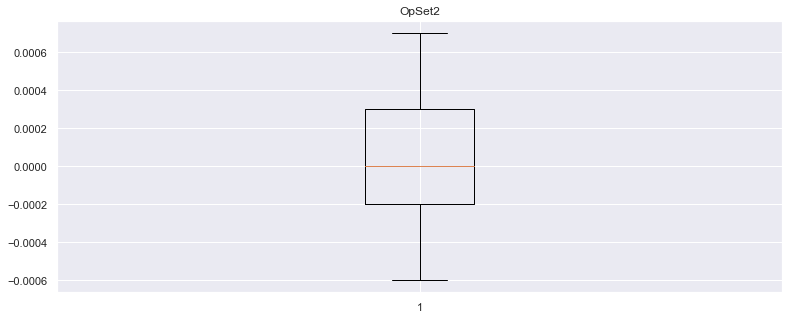

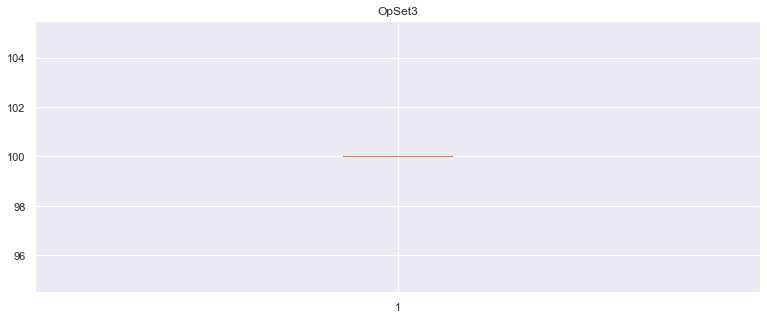

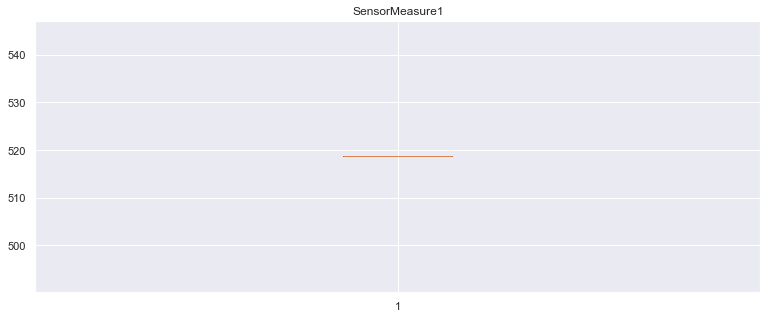

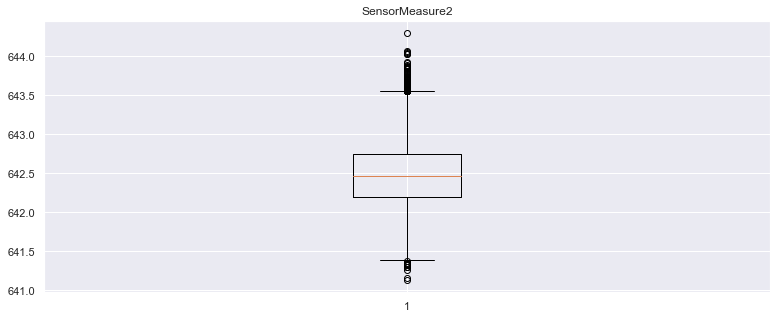

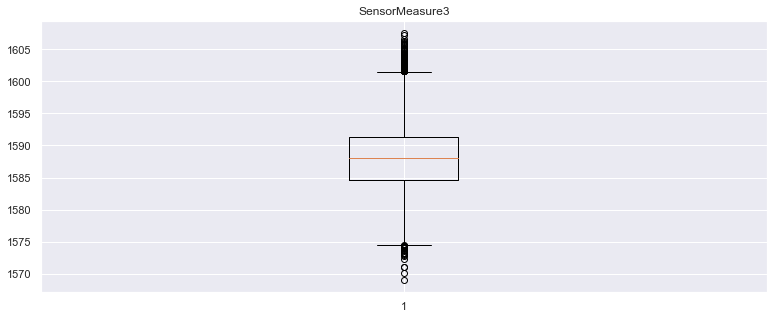

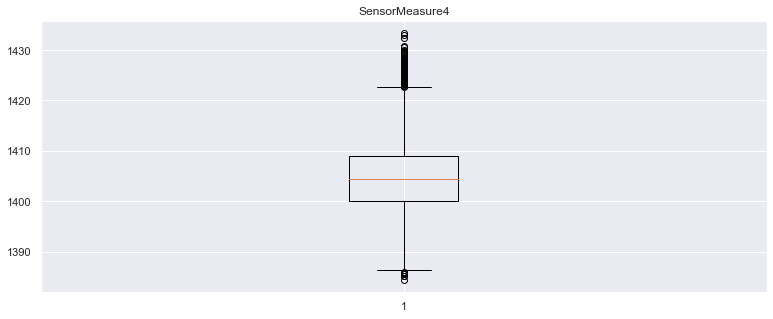

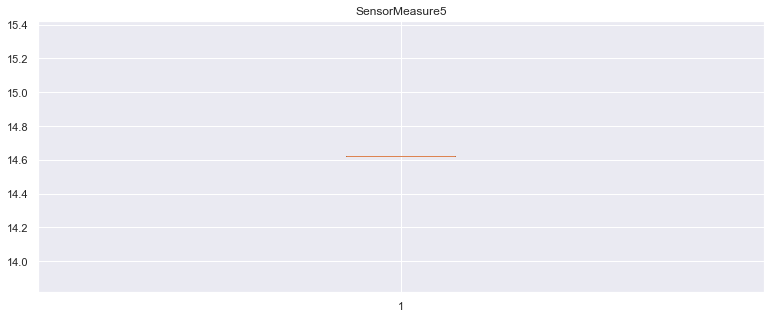

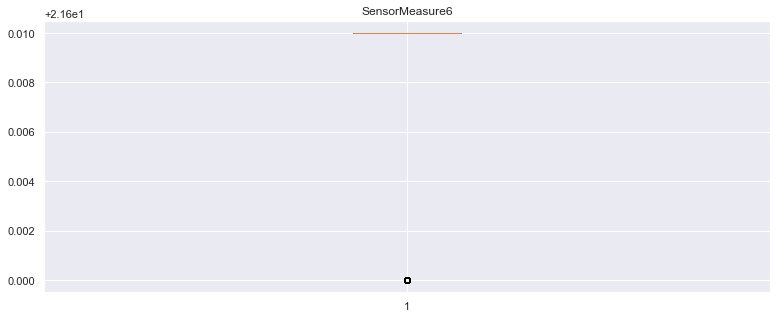

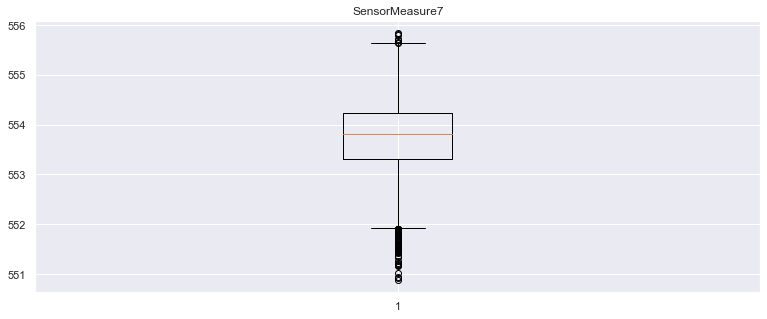

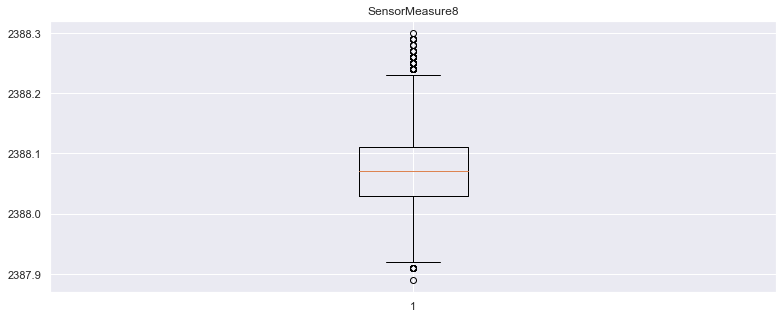

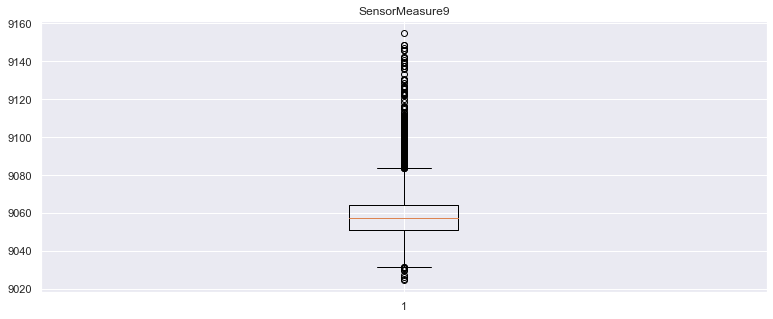

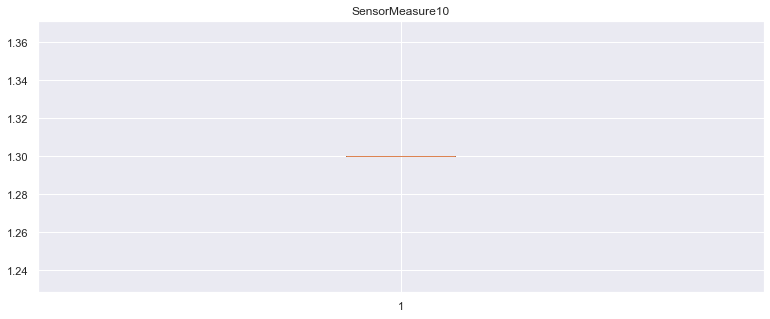

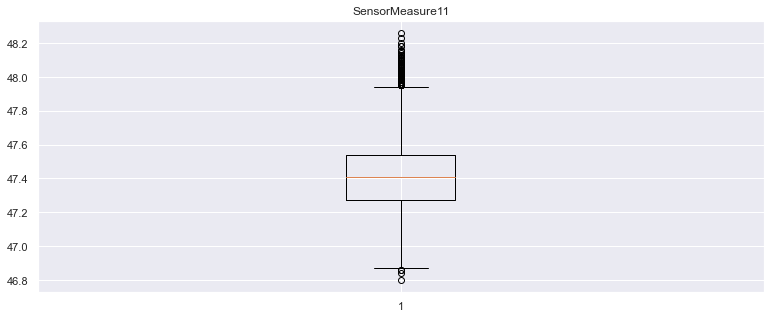

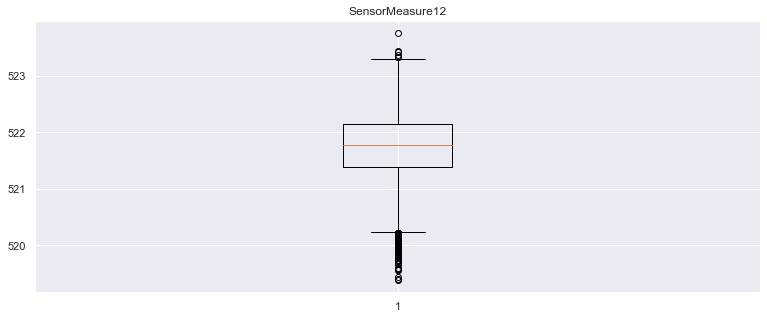

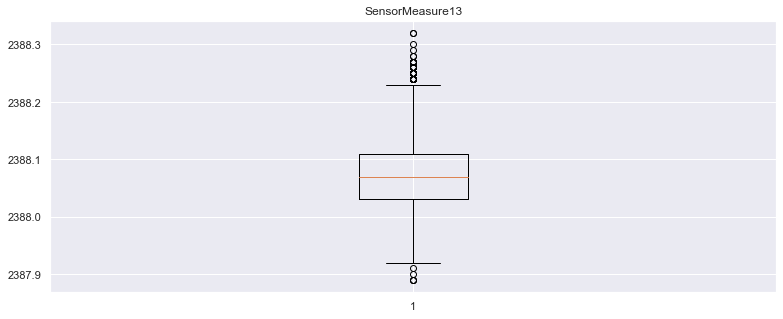

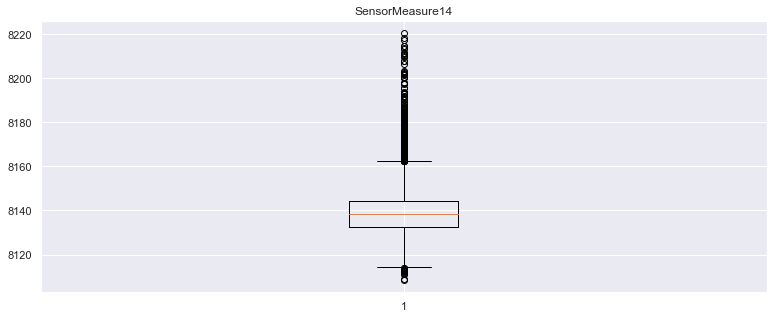

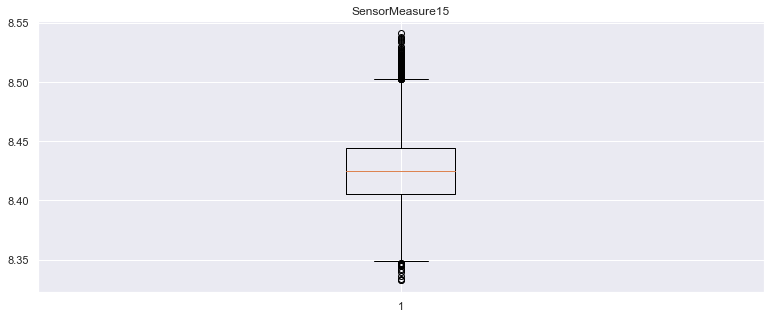

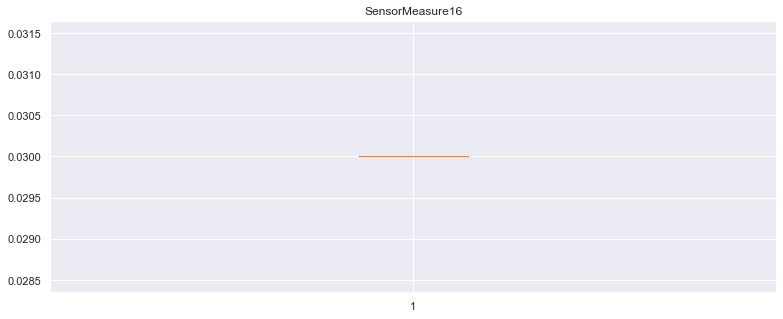

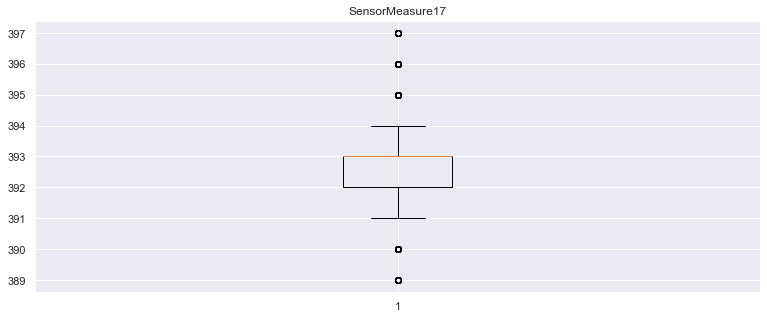

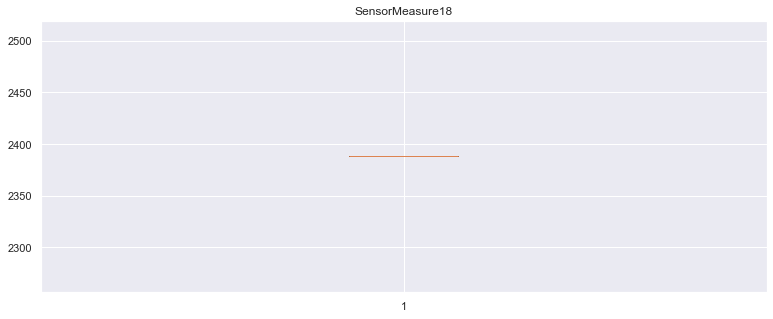

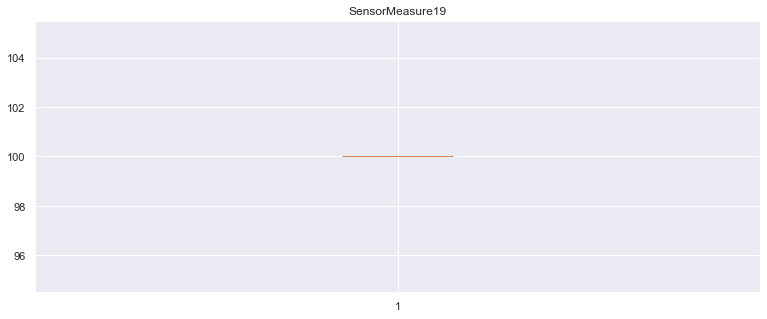

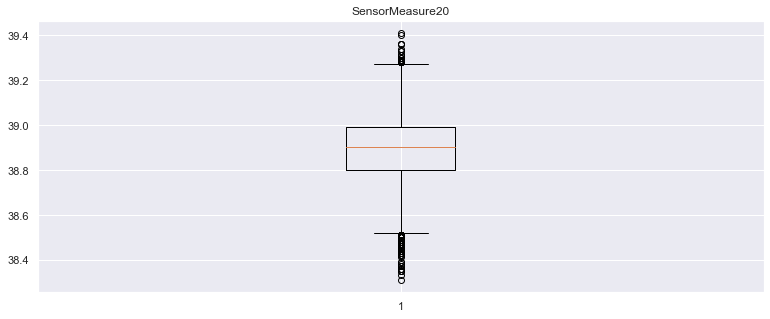

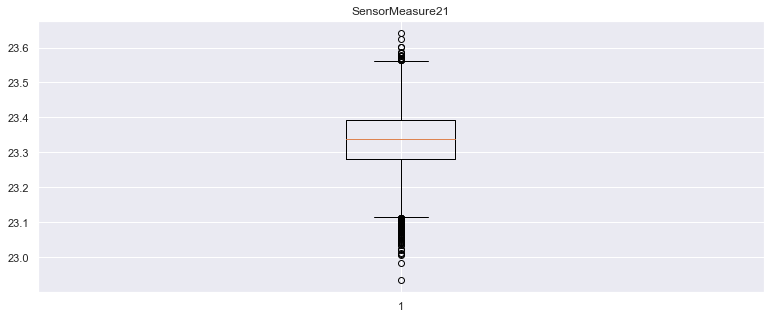

In [15]:
for i in np.arange(2, 26):
    plt.figure(figsize=(13,5))
    temp = test_data.iloc[:, i]
    plt.boxplot(temp)
    plt.title(test_data.columns[i])
    plt.show()

# Plot

In [16]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in test_data['ID'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=test_data[test_data['ID']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

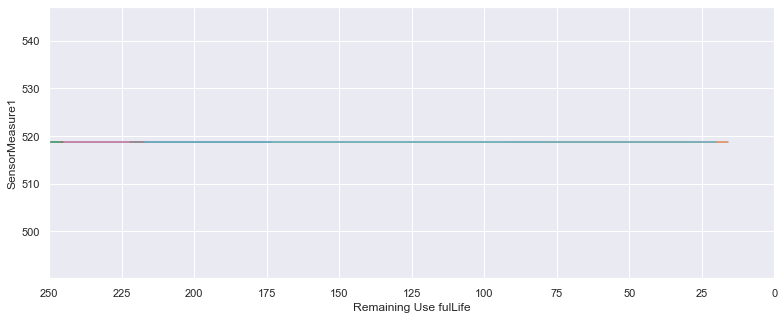

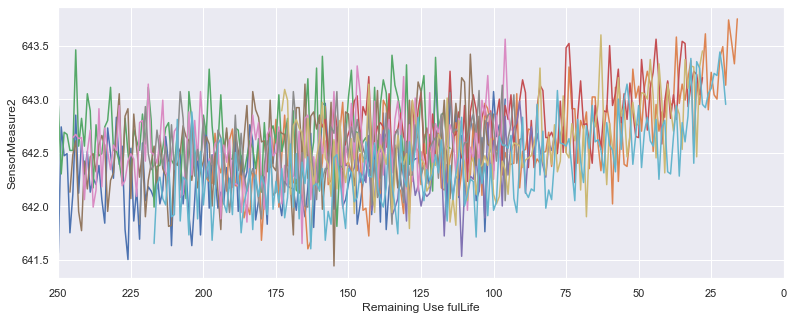

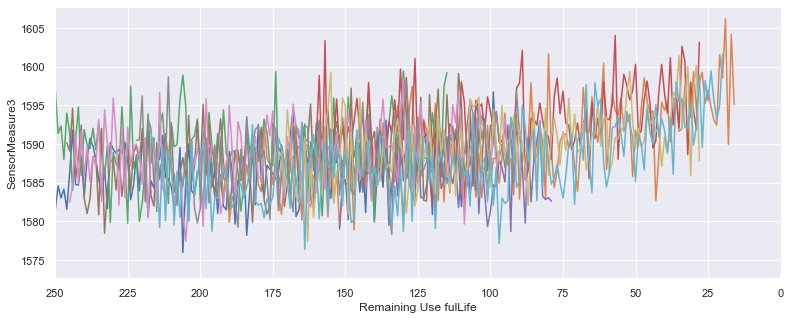

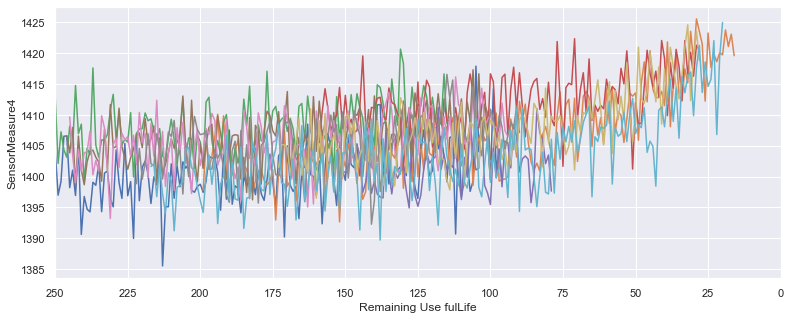

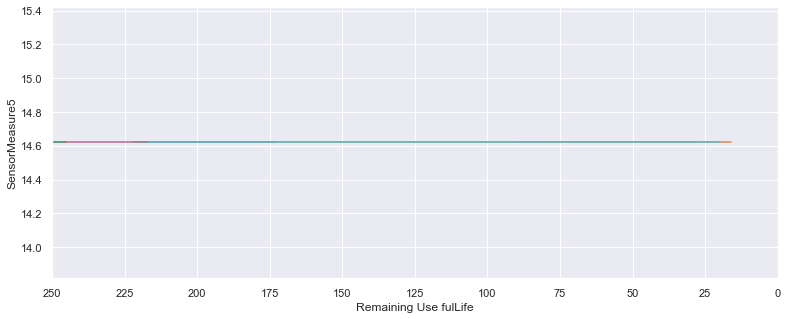

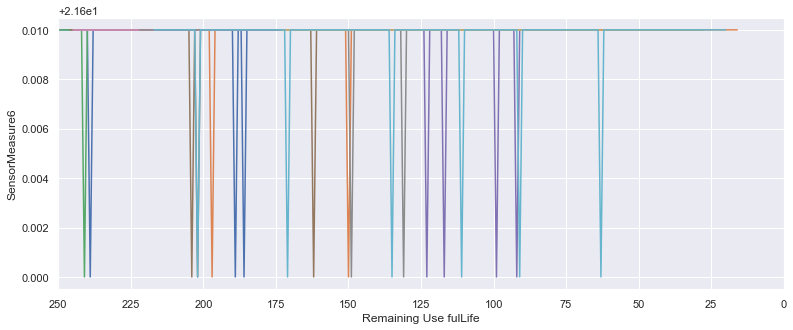

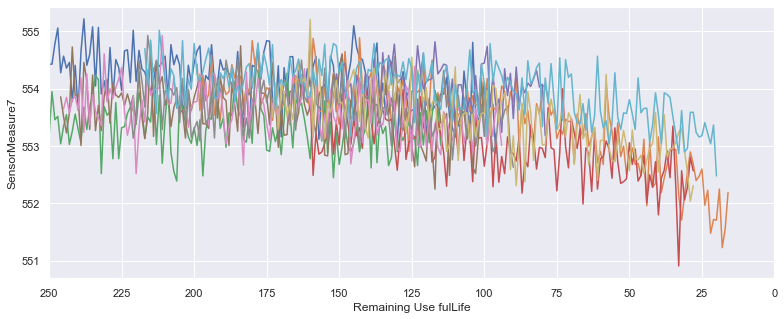

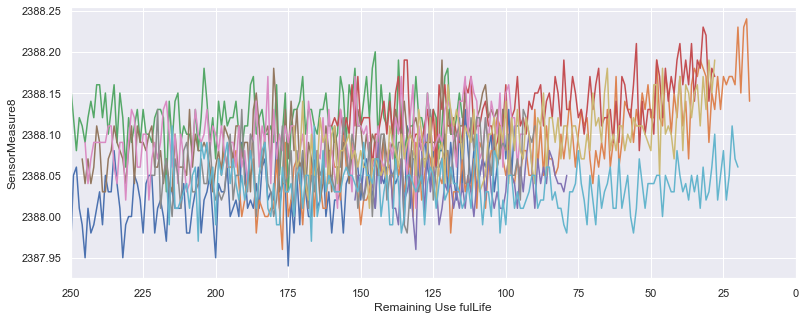

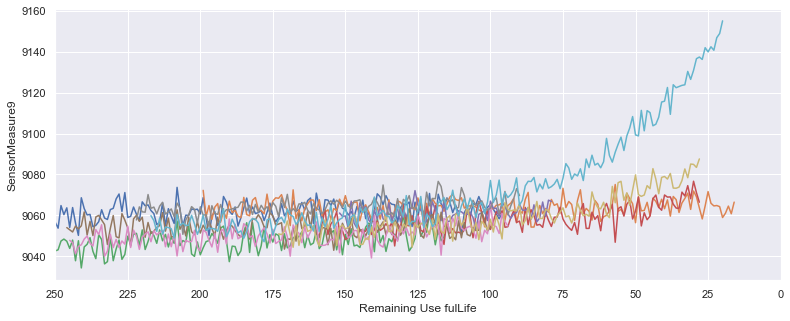

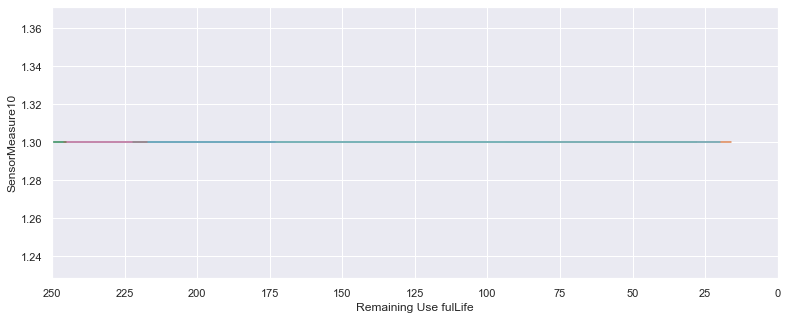

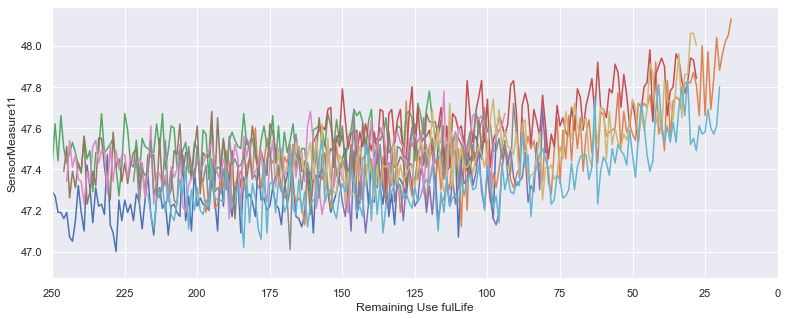

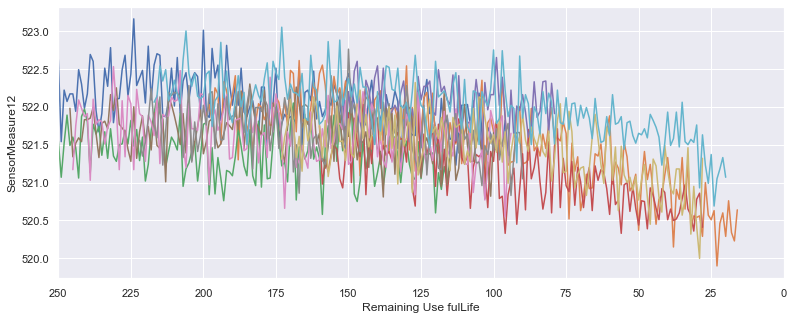

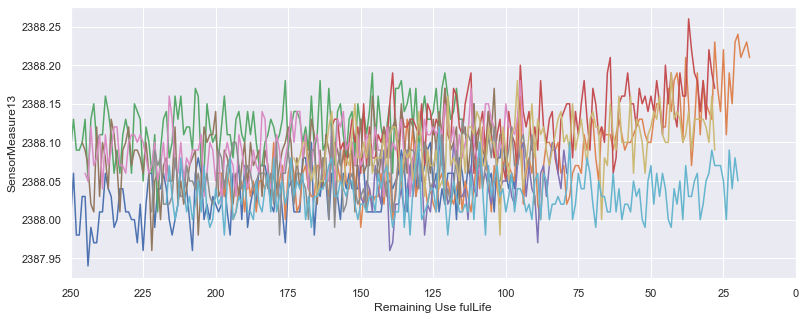

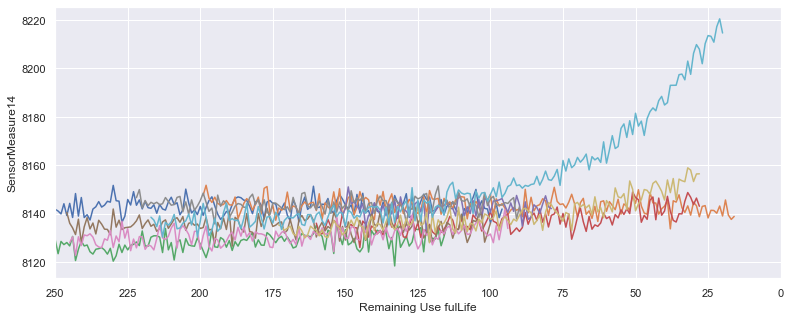

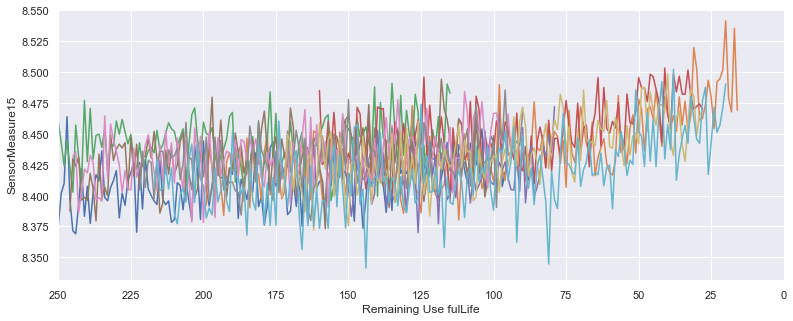

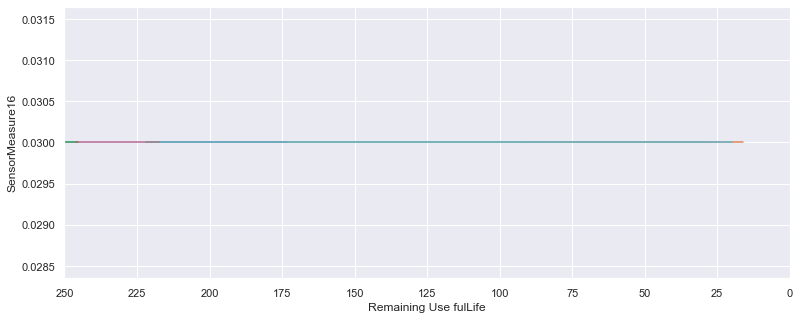

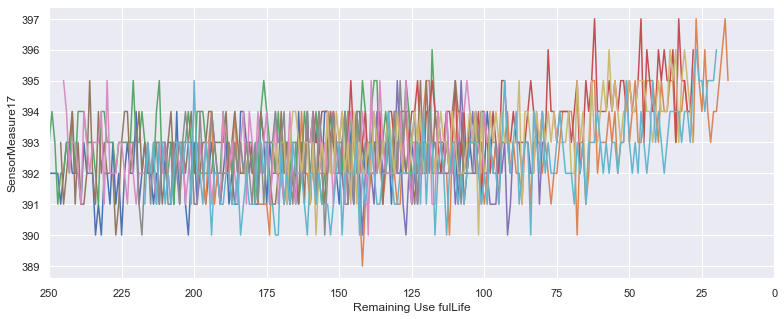

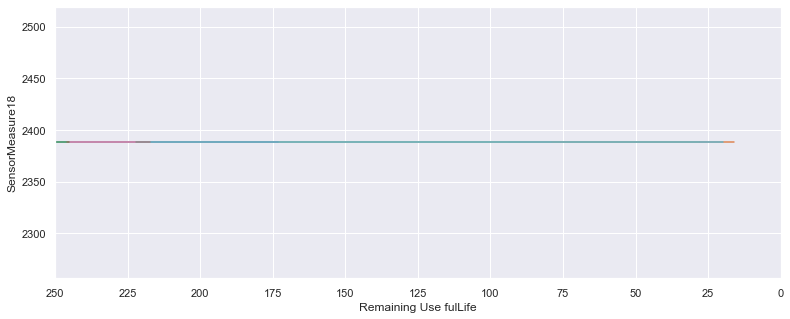

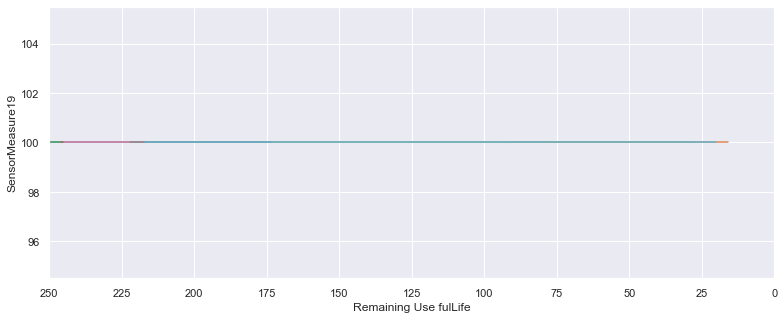

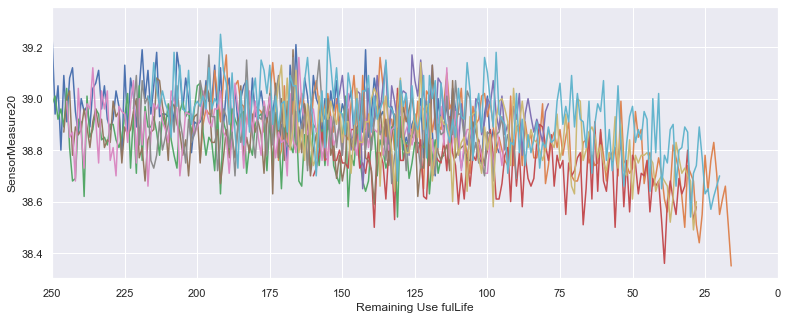

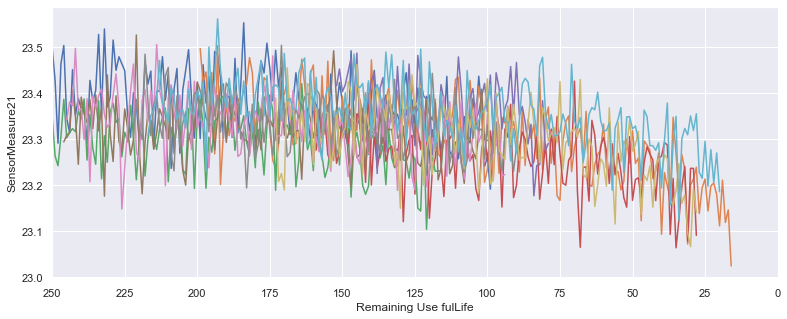

In [17]:
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

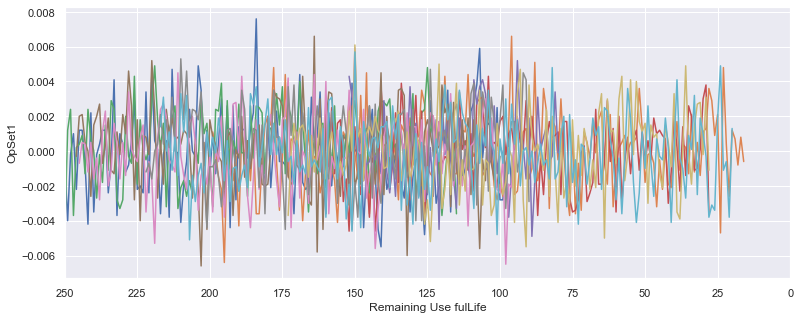

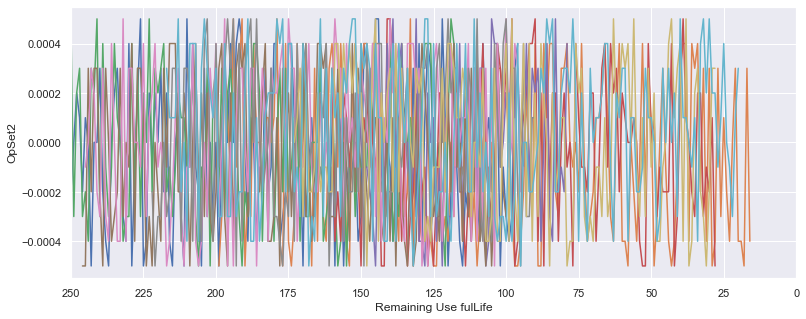

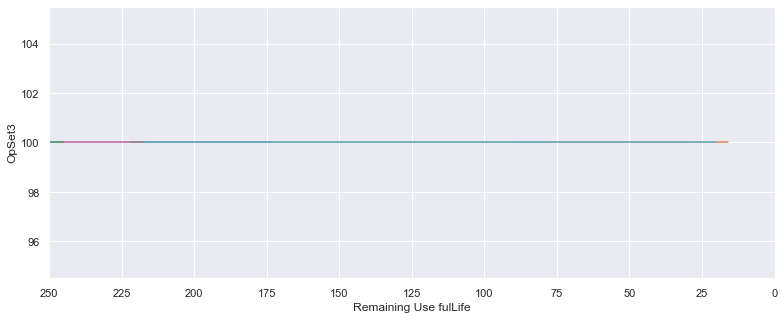

In [18]:
for setting in setting_names:
    plot_sensor(setting)